# Telco Project
## Author: Shuo Xu

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


#### Import Data

In [37]:
df = pd.read_excel("Telco.xlsx")

In [38]:
print("This dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

This dataset has 7043 rows and 33 columns.


#### Other than Churn Reason, this data set does not have missing values.

In [39]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### Explore the data

In [41]:
print("All observations are within {}.".format(df.Country.unique()))

All observations are within ['United States'].


In [42]:
print("All observations are within {}.".format(df.State.unique()))

All observations are within ['California'].


In [85]:
Total_Churn_Rate = round(df['Churn Value'].value_counts()[1]/(df['Churn Value'].value_counts()[0]+df['Churn Value'].value_counts()[1])*100,2)
print("{} percent of observations churn from the company.".format(Total_Churn_Rate))
print("We have an inbalanced dataset.")

26.54 percent of observations churn from the company.
We have an inbalanced dataset.


In [119]:
def Churn_Rate_By_Sector(sector):
    sector_dictionary = {}
    sector_list = [x for x in df[sector].unique()]
    for s in sector_list:
        value_counts = df[df[sector]==s]['Churn Value'].value_counts()
        if len(value_counts) == 2:
            churn = value_counts[1]
            not_churn = value_counts[0]
        else:
            value_counts
        
        rate = round(churn/(churn+not_churn),2)
        sector_dictionary[s] = rate
    return sector_dictionary

#### Female customers have slightly higher churn rates.

<BarContainer object of 2 artists>

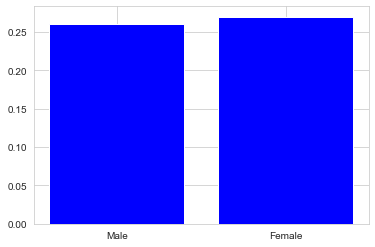

In [131]:
myDictionary = Churn_Rate_By_Sector('Gender')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Senior customers have higher churn rates.

<BarContainer object of 2 artists>

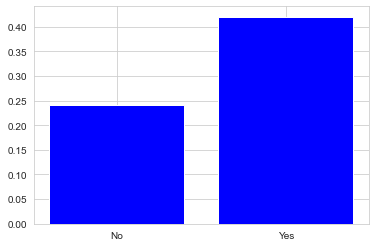

In [132]:
myDictionary = Churn_Rate_By_Sector('Senior Citizen')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who are single have higher churn rates.

<BarContainer object of 2 artists>

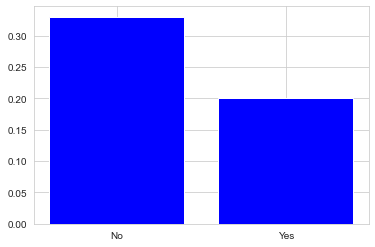

In [133]:
myDictionary = Churn_Rate_By_Sector('Partner')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not have dependent have higher churn rates.

<BarContainer object of 2 artists>

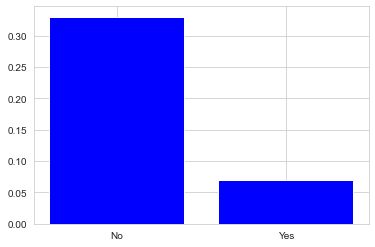

In [134]:
myDictionary = Churn_Rate_By_Sector('Dependents')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers with a Month-to-month contract have higher churn rates

<BarContainer object of 3 artists>

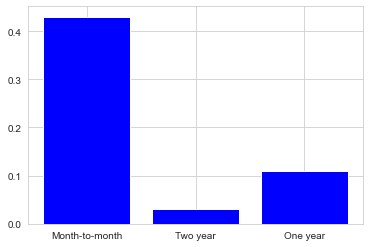

In [129]:
myDictionary = Churn_Rate_By_Sector('Contract')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

In [144]:
test = [x for x in df['Tenure Months'].unique()]
test[-1]

0

In [170]:
df[df['Gender']=='Female']['Churn Value'].value_counts()

0    2549
1     939
Name: Churn Value, dtype: int64

In [111]:
Columns = [x for x in df.columns]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.24 , 0.258, 0.276, 0.294, 0.312, 0.33 , 0.348, 0.366, 0.384,
        0.402, 0.42 ]),
 <BarContainer object of 10 artists>)

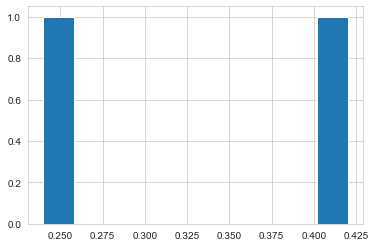

In [118]:
plt.hist(Churn_Rate_By_Sector('Senior Citizen'))

In [64]:
Cities = [x for x in df.City.unique()]

In [70]:
City_Dict = {}
for City in Cities:
    City_Dict[City] = df[df['City']==City]['Count'].sum()

In [73]:
import operator
City_Dict= dict(sorted(City_Dict.items(), key=operator.itemgetter(1),reverse=True))

5174